In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, lib
from dotenv import load_dotenv
import typing

load_dotenv()

True

In [2]:
sys, dat, df = [], [], []

for file in glob.glob(os.path.join(os.getcwd(), "**", "*.xlsx"), recursive=True):
    try:
        a = pd.read_excel(file, sheet_name="System Reliability Data", engine='openpyxl')
        b = pd.read_excel(file, sheet_name="System Reliability Data", engine='openpyxl', skiprows=8)
        sys.append(a["Unnamed: 2"][1])
        dat.append(a["Unnamed: 2"][2])
        df.append(pd.DataFrame(b.iloc[:,17:-1].iloc[1]).T)
    except:
        continue

In [3]:
c = pd.concat([df[j] for j in range(len(df))])
c["Date"], c["System"] = dat, sys
c = c.drop_duplicates() # TODO: Even tho the duplicates are being removed, gotta remove manually all the duplicated data (just in case)
c.index = c["Date"]

In [4]:
c["System"].value_counts()

System
Alpena Power Co.                    12
Consumers Energy Co.                12
DTE Energy Co.                      12
Northern States Power Co. (Xcel)    12
Upper Peninsula Power Co.           12
Name: count, dtype: int64

In [5]:
# TODO: This can be implemented using a List
# In the list will be put all the Items we wanna filter throught, so it isn't necessary to write a "|" statement for each of them 

c1 = c[(c["System"] == "Consumers Energy Co.") | (c["System"] == "DTE Energy Co.") | (c["System"] == "Indiana Michigan Power Co.")]

In [32]:
def standarize(vector: np.ndarray, method: typing.Literal["min-max", 'z-score']) -> np.ndarray:
    vector = np.array(vector)

    if method == "min-max":
        return (vector - vector.min()) / (vector.max() - vector.min())
    
    if method == 'z-score':
        return (vector - vector.mean()) / vector.std()

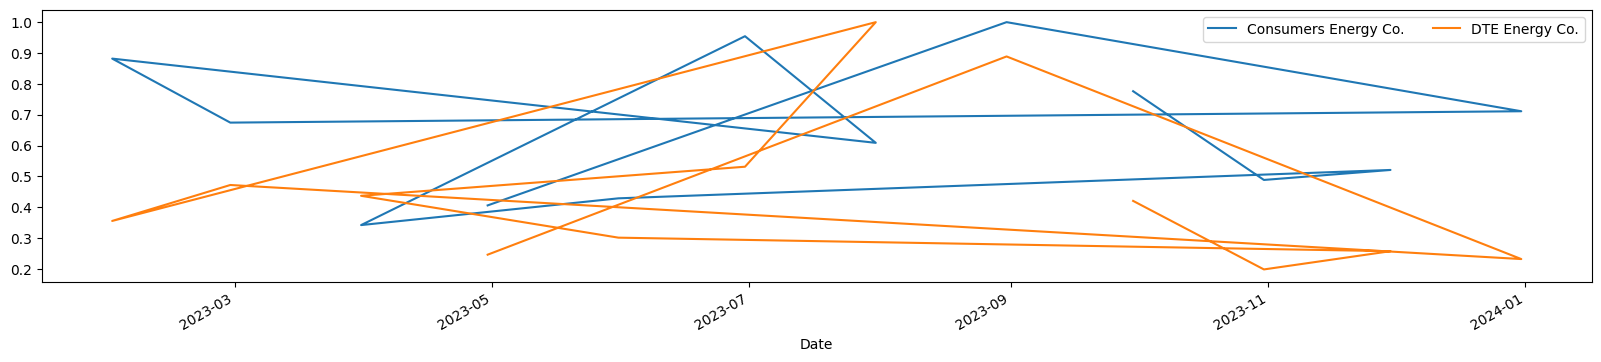

In [6]:
plt.figure(figsize = (20,4))

# ! Plot
# Using the data of "Other" causes of each Company

for i in c1["System"].value_counts().index:
    (c1[c1["System"] == i]["Total number of outages caused by other causes"] / c1[c1["System"] == i]["Total number of outages caused by other causes"].max()).plot(label=i)
    plt.legend(ncol=3)

In [7]:
try:
    raw_data = pd.read_csv(os.getenv('FILE_PATH_OMNI'), delimiter=" +", names=range(55), engine="python")
except:
    print("<Exception> OMNI File Required")
    exit(0)

In [8]:
data = raw_data[[0, 1, 2, 38, 39, 40, 49, 50, 22, 23, 24, 27, 28, 8]] # + Data to be used
data = data[(data[0]>=2023) & (data[0]<=2023)]

# TODO: Explain for what every column will be used for ...

data.columns = [
    "Year", # Kinda obvious ...
    "DecimalYear", #
    "Hour", #
    "Kp", #
    "R", #
    "DST", #
    "Ap", #
    "F10.7", #
    "Proton temperature", #
    "Proton Density", #
    "Plasma speed", #
    "Alpha/Proton ratio", #
    "Flow Pressure", #
    "Field Magnitude Average |B|" #
]
data.index = pd.date_range("2023", "2024", freq="60min")[:-1]
data = data[["Kp", "R", "DST", "Ap", "F10.7", "Proton temperature", "Proton Density", "Plasma speed", "Alpha/Proton ratio",
              "Flow Pressure", "Field Magnitude Average |B|"]]
data

,Kp,R,DST,Ap,F10.7,Proton temperature,Proton Density,Plasma speed,Alpha/Proton ratio,Flow Pressure,Field Magnitude Average |B|
2023-01-01 00:00:00,23,108,-23,9,147.5,111138.0,2.4,603.0,0.038,1.68,5.6
2023-01-01 01:00:00,23,108,-21,9,147.5,157287.0,2.6,582.0,0.046,1.74,5.0
2023-01-01 02:00:00,23,108,-23,9,147.5,143309.0,2.6,581.0,0.044,1.72,5.2
2023-01-01 03:00:00,30,108,-26,15,147.5,138155.0,2.4,576.0,0.046,1.57,5.0
2023-01-01 04:00:00,30,108,-26,15,147.5,130313.0,2.5,585.0,0.044,1.68,4.9
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,10,53,0,4,141.4,19420.0,8.3,313.0,0.032,1.53,5.5
2023-12-31 20:00:00,10,53,1,4,141.4,20026.0,10.0,324.0,0.037,2.01,5.7
2023-12-31 21:00:00,13,53,2,5,141.4,26732.0,9.2,318.0,0.025,1.71,5.7
2023-12-31 22:00:00,13,53,2,5,141.4,26675.0,8.6,311.0,0.034,1.58,5.5


In [9]:
# TODO: Refactor this. if possible

data["F10.7"] = np.where(data["F10.7"] == 999.9, np.nan, data["F10.7"])
data["Kp"] = np.where(data["Kp"] == 99, np.nan, data["Kp"])
data["R"] = np.where(data["R"] == 999, np.nan, data["R"])
data["DST"] = np.where(data["DST"] == 99999, np.nan, data["DST"])
data["Ap"] = np.where(data["Ap"] == 999, np.nan, data["Ap"])
data["Proton temperature"] = np.where(data["Proton temperature"] == 9999999, np.nan, data["Proton temperature"])
data["Proton Density"] = np.where(data["Proton Density"] == 999.9, np.nan, data["Proton Density"])
data["Plasma speed"] = np.where(data["Plasma speed"] == 9999, np.nan, data["Plasma speed"])
data["Alpha/Proton ratio"] = np.where(data["Alpha/Proton ratio"] == 9.999, np.nan, data["Alpha/Proton ratio"])
data["Flow Pressure"] = np.where(data["Flow Pressure"] == 99.99, np.nan, data["Flow Pressure"])
data["Field Magnitude Average |B|"] = np.where(data["Field Magnitude Average |B|"] == 999.9, np.nan, data["Field Magnitude Average |B|"])

In [10]:
data = data[(data.index >= "2023")]
data

,Kp,R,DST,Ap,F10.7,Proton temperature,Proton Density,Plasma speed,Alpha/Proton ratio,Flow Pressure,Field Magnitude Average |B|
2023-01-01 00:00:00,23.0,108.0,-23.0,9.0,147.5,111138.0,2.4,603.0,0.038,1.68,5.6
2023-01-01 01:00:00,23.0,108.0,-21.0,9.0,147.5,157287.0,2.6,582.0,0.046,1.74,5.0
2023-01-01 02:00:00,23.0,108.0,-23.0,9.0,147.5,143309.0,2.6,581.0,0.044,1.72,5.2
2023-01-01 03:00:00,30.0,108.0,-26.0,15.0,147.5,138155.0,2.4,576.0,0.046,1.57,5.0
2023-01-01 04:00:00,30.0,108.0,-26.0,15.0,147.5,130313.0,2.5,585.0,0.044,1.68,4.9
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,10.0,53.0,0.0,4.0,141.4,19420.0,8.3,313.0,0.032,1.53,5.5
2023-12-31 20:00:00,10.0,53.0,1.0,4.0,141.4,20026.0,10.0,324.0,0.037,2.01,5.7
2023-12-31 21:00:00,13.0,53.0,2.0,5.0,141.4,26732.0,9.2,318.0,0.025,1.71,5.7
2023-12-31 22:00:00,13.0,53.0,2.0,5.0,141.4,26675.0,8.6,311.0,0.034,1.58,5.5


In [11]:
# Hacemos una funcion que te permite agregar las columnas y llenarlas de 0
def create_columns(df, new_columns):
    df[new_columns] = np.zeros((len(df), len(new_columns)))
    return df

In [12]:
# Creating a copy of the dataframe (in order to manipulate them)
df = data.copy() 

# Columns go from "G0" to "G5"
new_columns_kp = ['G0' , 'G1', 'G2', 'G3', 'G4', 'G5']

# df[new_columns_kp] = np.zeros((len(df), len(new_columns_kp)))
df = create_columns(df, new_columns_kp)

In [13]:
# Conditions ... 
conditions = {
    'G0': data['Kp'].le(43),
    'G1': data['Kp'].between(46, 54),
    'G2': data['Kp'].between(56, 64),
    'G3': data['Kp'].between(66, 74),
    'G4': data['Kp'].between(76, 88),
    'G5': data['Kp'].ge(90)
}

for G, condition in conditions.items(): 
    df[G] = condition

In [14]:
def resample_kp(df, lvl, closed = None):
    df_resampled_kp = df.resample(rule = lvl, closed = closed).agg({
        'Kp': 'max',
        'R': 'mean',
        'F10.7': 'mean',
        'Proton temperature': 'mean',
        'Proton Density': 'mean',
        'Plasma speed': 'mean',
        'Alpha/Proton ratio': 'mean',
        'Flow Pressure': 'mean',
        'Field Magnitude Average |B|': 'mean',
        'G1': 'sum',
        'G2': 'sum',
        'G3': 'sum',
        'G4': 'sum',
        'G5': 'sum',
    })    
    df_resampled_kp['Total ST'] = df_resampled_kp[['G1','G2','G3','G4','G5']].sum(axis = 1)
    return df_resampled_kp

In [15]:
freq = "M"

In [16]:
df_resample_kp = resample_kp(df, freq)
df_resample_kp['Solar Cycle'] = pd.cut(df_resample_kp.index,
                                     bins = [
                                          pd.to_datetime('1964-10-01'),
                                          pd.to_datetime('1976-03-01'),
                                          pd.to_datetime('1986-09-01'),
                                          pd.to_datetime("1996-08-01"), 
                                          pd.to_datetime("2008-12-31"),
                                          pd.to_datetime("2019-12-31"), 
                                          pd.to_datetime("2100-01-01")
                                    ],
                                     labels=[20,21,22,23,24,25])
df_resample_kp = df_resample_kp.rename(columns={"Kp":"Kp max"})
df_resample_kp

C:\Users\Mauro Gonzalez\AppData\Local\Temp\ipykernel_29388\893015474.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled_kp = df.resample(rule = lvl, closed = closed).agg({


,Kp max,R,F10.7,Proton temperature,Proton Density,Plasma speed,Alpha/Proton ratio,Flow Pressure,Field Magnitude Average |B|,G1,G2,G3,G4,G5,Total ST,Solar Cycle
2023-01-31,50.0,144.354839,176.658065,106314.411848,5.397893,431.507022,0.037441,1.881742,7.201934,9,0,0,0,0,9,25
2023-02-28,67.0,111.285714,173.775000,128772.500849,6.414261,450.003396,0.038533,2.317708,7.122391,15,18,9,0,0,42,25
2023-03-31,80.0,123.322581,156.032258,131198.779273,4.823957,474.960969,0.036498,1.918789,6.743956,12,12,9,3,0,36,25
2023-04-30,83.0,97.566667,146.710000,105354.005556,4.985694,446.883333,0.042360,1.781014,6.831667,9,3,9,6,0,27,25
2023-05-31,60.0,137.419355,159.851613,116424.366255,4.500685,465.679452,0.039656,1.893685,6.023973,24,12,0,0,0,36,25
2023-06-30,60.0,160.500000,166.803333,103239.597222,5.514861,416.787500,0.033797,1.620208,6.239028,18,3,0,0,0,21,25
2023-07-31,47.0,159.096774,182.858065,118109.233894,5.416643,401.141259,0.042963,1.633371,6.154265,9,0,0,0,0,9,25
2023-08-31,63.0,114.838710,157.567742,91232.919355,5.909812,394.887097,0.037086,1.558898,6.375269,9,3,0,0,0,12,25
2023-09-30,63.0,133.633333,156.036667,76271.720863,6.578766,422.037303,0.040684,2.322568,6.980580,57,12,0,0,0,69,25
2023-10-31,50.0,99.387097,141.909677,73044.173620,7.057124,380.083333,0.039798,1.833414,5.696371,15,0,0,0,0,15,25


In [17]:
c1_CEC = c1[c1["System"] == "Consumers Energy Co."]
c1_CEC["TotalStorms"] = df_resample_kp["Total ST"]
c1_CEC["G1"] = df_resample_kp["G1"]
c1_CEC["G2"] = df_resample_kp["G2"]
c1_CEC["G3"] = df_resample_kp["G3"]
c1_CEC["G4"] = df_resample_kp["G4"]
c1_CEC["G5"] = df_resample_kp["G5"]

C:\Users\Mauro Gonzalez\AppData\Local\Temp\ipykernel_29388\1989184183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1_CEC["TotalStorms"] = df_resample_kp["Total ST"]
C:\Users\Mauro Gonzalez\AppData\Local\Temp\ipykernel_29388\1989184183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1_CEC["G1"] = df_resample_kp["G1"]
C:\Users\Mauro Gonzalez\AppData\Local\Temp\ipykernel_29388\1989184183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [18]:
df = c1.copy()
df['TotalStorms'] = df_resample_kp['Total ST']
df['G1'] = df_resample_kp['G1']
df['G2'] = df_resample_kp['G2']
df['G3'] = df_resample_kp['G3']
df['G4'] = df_resample_kp['G4']
df['G5'] = df_resample_kp['G5']

In [24]:
df

,Total Customer outages,Total number of outages causes by equipment failure,Total number of outages caused by lightning,Total number of planned and forced outages,Total number of outages caused by transmission or generation failure,Total number of outages caused by an act of the public at large,Total number of outages caused by trees,Total number of outage caused by weather,Total number of outages caued by animal interference,Total number of outages caused by unknonwn causes,...,Customer Average Interruption Duration Index (contribution to total CAIDI),Average Service Availability Index,Date,System,TotalStorms,G1,G2,G3,G4,G5
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-30,166479.0,36069.0,10596.0,19857.0,4278.0,7166.0,42075.0,15248.0,3117.0,19055.0,...,181.67,0.9997,2023-04-30,Consumers Energy Co.,27,9,3,9,6,0
2023-08-31,447006.0,56264.0,4890.0,12528.0,484.0,15786.0,192187.0,110632.0,7935.0,24081.0,...,1141.1,0.9942,2023-08-31,Consumers Energy Co.,12,9,3,0,0,0
2023-12-31,183725.0,40378.0,342.0,19383.0,2.0,9221.0,61969.0,11617.0,6406.0,18606.0,...,185.8,0.9996,2023-12-31,Consumers Energy Co.,33,27,3,3,0,0
2023-02-28,524990.0,49439.0,68.0,8213.0,61.0,9432.0,270640.0,147689.0,2067.0,22399.0,...,1651.57,0.9887,2023-02-28,Consumers Energy Co.,42,15,18,9,0,0
2023-01-31,98787.0,27701.0,8.0,7578.0,3312.0,20222.0,10240.0,3422.0,1032.0,5679.0,...,143.53,0.9998,2023-01-31,Consumers Energy Co.,9,9,0,0,0,0
2023-07-31,307965.0,45618.0,6128.0,22199.0,0.0,13877.0,135369.0,42640.0,5543.0,23067.0,...,295.84,0.999,2023-07-31,Consumers Energy Co.,9,9,0,0,0,0
2023-06-30,240521.0,60750.0,2967.0,13824.0,867.0,15324.0,78197.0,19399.0,11299.0,16688.0,...,210.11,0.9994,2023-06-30,Consumers Energy Co.,21,18,3,0,0,0
2023-03-31,159341.0,23933.0,609.0,2391.0,1.0,17370.0,56635.0,31829.0,2926.0,16046.0,...,278.43,0.9995,2023-03-31,Consumers Energy Co.,36,12,12,9,3,0
2023-05-31,114730.0,25332.0,37.0,5674.0,1561.0,16963.0,33371.0,2594.0,11782.0,7888.0,...,161.05,0.9998,2023-05-31,Consumers Energy Co.,36,24,12,0,0,0


In [25]:
df.columns

Index(['Total Customer outages ',
       'Total number of outages causes by equipment failure',
       'Total number of outages caused by lightning',
       'Total number of planned and forced outages',
       'Total number of outages caused by  transmission or generation failure',
       'Total number of outages caused by an act of the public at large',
       'Total number of outages caused by trees',
       'Total number of outage caused by weather',
       'Total number of outages caued by animal interference',
       'Total number of outages caused by unknonwn causes',
       'Total number of outages caused by other causes',
       'System Average Interruption Duration Index',
       'System Average Interruption Frequency Index',
       'Customer Average Interruption Duration Index (contribution to total CAIDI) ',
       'Average Service Availability Index', 'Date', 'System', 'TotalStorms',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [39]:
def calculate_columns(df: pd.DataFrame, col_name: str, cols: typing.List[str], type: typing.Literal['average', 'sumatory', 'median']) -> pd.DataFrame:
    if type == 'average':
        df[col_name] = df[cols].mean(axis=1)
        return df
    
    if type == 'sumatory': 
        df[col_name] = df[cols].sum(axis=1)
        return df
    
    if type == 'median':
        df[col_name] = df[cols].median(axis=1)
        return df

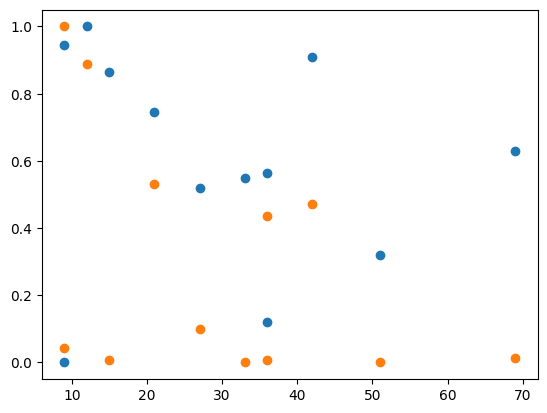

In [46]:
df: pd.DataFrame = calculate_columns(df=df.copy(), col_name="NII", cols=['Total number of outages caused by unknonwn causes', 'Total number of outages caused by other causes', 'Total number of outage caused by weather'], type="median")

for i in df['System'].value_counts().index:
    plt.scatter(df[df['System'] == i]['TotalStorms'], standarize(vector=df[df['System'] == i]["NII"], method='min-max'))

# plt.scatter(c1_CEC["TotalStorms"], c1_CEC["Total number of outages caused by unknonwn causes"])

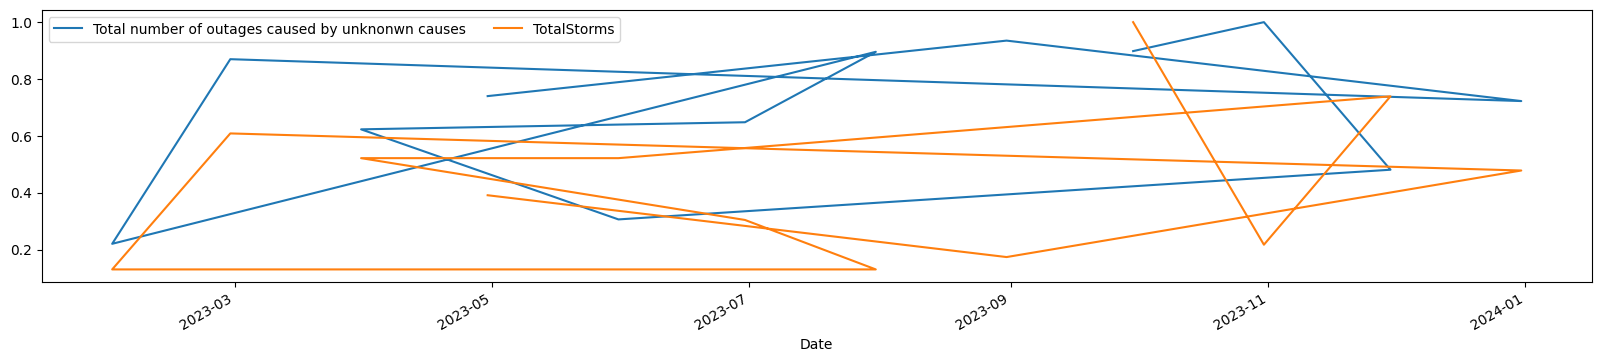

In [22]:
plt.figure(figsize=(20,4))
(c1_CEC["Total number of outages caused by unknonwn causes"] / c1_CEC["Total number of outages caused by unknonwn causes"].max()).plot()
(c1_CEC["TotalStorms"] / c1_CEC["TotalStorms"].max()).plot()
plt.legend(ncol=3)

In [23]:
np.corrcoef(np.array(c1_CEC["Total number of outages caused by unknonwn causes"]), np.array(c1_CEC["TotalStorms"]))

AttributeError: 'float' object has no attribute 'shape'

In [ ]:
c1_CEC.corr(numeric_only=True)